# Import all the necessary models and packages.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from datetime import date
import datetime as dt
import statsmodels.api as sm
from scipy import stats
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings('ignore')

# Custom function to print accuarcy metrics and plot a graph

In [200]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("MAE:"+ str(mse))
    mae = metrics.mean_absolute_error(df1,(df2))
    
    #print("Root mean squared error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.regplot(x=df2,y=df1)

In [201]:
file_url ='PreProcessedFiles/training_data.csv'
df = pd.read_csv(file_url)

# Exploratory Data Analysis and Data visualization¶


In [202]:
df.head()

,City,Property Type,Period Begin,Period End,Median Sale Price (in 000's of dollars)
0,Redmond,All Residential,4/1/17,4/30/17,735
1,Mercer Island,Condo/Co-op,11/1/17,11/30/17,389
2,Tacoma,Condo/Co-op,4/1/16,4/30/16,228
3,Bothell,All Residential,1/1/10,1/31/10,295
4,Tacoma,All Residential,1/1/10,1/31/10,179


Use the describe method to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [203]:
df.describe()

,City,Property Type,Period Begin,Period End,Median Sale Price (in 000's of dollars)
count,6347,6347,6347,6347,6347
unique,13,5,117,117,1011
top,Tacoma,All Residential,8/1/18,8/31/18,350
freq,585,1521,58,58,44


In [204]:
df.shape

(6347, 5)

In [205]:
df.columns

Index(['City', 'Property Type', 'Period Begin', 'Period End',
       'Median Sale Price (in 000's of dollars)'],
      dtype='object')

In [206]:
df.dtypes

City                                       object
Property Type                              object
Period Begin                               object
Period End                                 object
Median Sale Price (in 000's of dollars)    object
dtype: object

In [207]:
df['City'].count()

6347

In [208]:
df["Median Sale Price (in 000's of dollars)"][2]

'228'

# Data Cleaning

1) Removing comma in the target variable "Median Sale Price (in 000's of dollars)"

In [176]:
df["Median Sale Price (in 000's of dollars)"] = df["Median Sale Price (in 000's of dollars)"].str.replace(",","").astype(float)

2) Converting Date variable which is object to Pandas compatible datetime datatype

In [177]:
import datetime as dt
df['date_parsed_begin'] = pd.to_datetime(df['Period Begin'])


# Computing new columns

In [178]:
df['Month'] = df['date_parsed_begin'].dt.month
df['Year'] = df['date_parsed_begin'].dt.year

# Drop columns which are not required

In [179]:
df.drop(["Period Begin","Period End","date_parsed_begin"], axis = 1, inplace = True)

In [180]:
df.head()

,City,Property Type,Median Sale Price (in 000's of dollars),Month,Year
0,Redmond,All Residential,735.0,4,2017
1,Mercer Island,Condo/Co-op,389.0,11,2017
2,Tacoma,Condo/Co-op,228.0,4,2016
3,Bothell,All Residential,295.0,1,2010
4,Tacoma,All Residential,179.0,1,2010


In [181]:
df.columns

Index(['City', 'Property Type', 'Median Sale Price (in 000's of dollars)',
       'Month', 'Year'],
      dtype='object')

In [182]:
df = pd.get_dummies(df, columns = ['City','Property Type'],drop_first = True)

In [183]:
df.head()

,Median Sale Price (in 000's of dollars),Month,Year,City_Bothell,City_Issaquah,City_Kenmore,City_Kent,City_Kirkland,City_Mercer Island,City_Olympia,City_Redmond,City_Sammamish,City_Seattle,City_Snoqualmie,City_Tacoma,Property Type_Condo/Co-op,Property Type_Multi-Family (2-4 Unit),Property Type_Single Family Residential,Property Type_Townhouse
0,735.0,4,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,389.0,11,2017,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,228.0,4,2016,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,295.0,1,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,179.0,1,2010,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [184]:
df.columns

Index(['Median Sale Price (in 000's of dollars)', 'Month', 'Year',
       'City_Bothell', 'City_Issaquah', 'City_Kenmore', 'City_Kent',
       'City_Kirkland', 'City_Mercer Island', 'City_Olympia', 'City_Redmond',
       'City_Sammamish', 'City_Seattle', 'City_Snoqualmie', 'City_Tacoma',
       'Property Type_Condo/Co-op', 'Property Type_Multi-Family (2-4 Unit)',
       'Property Type_Single Family Residential', 'Property Type_Townhouse'],
      dtype='object')

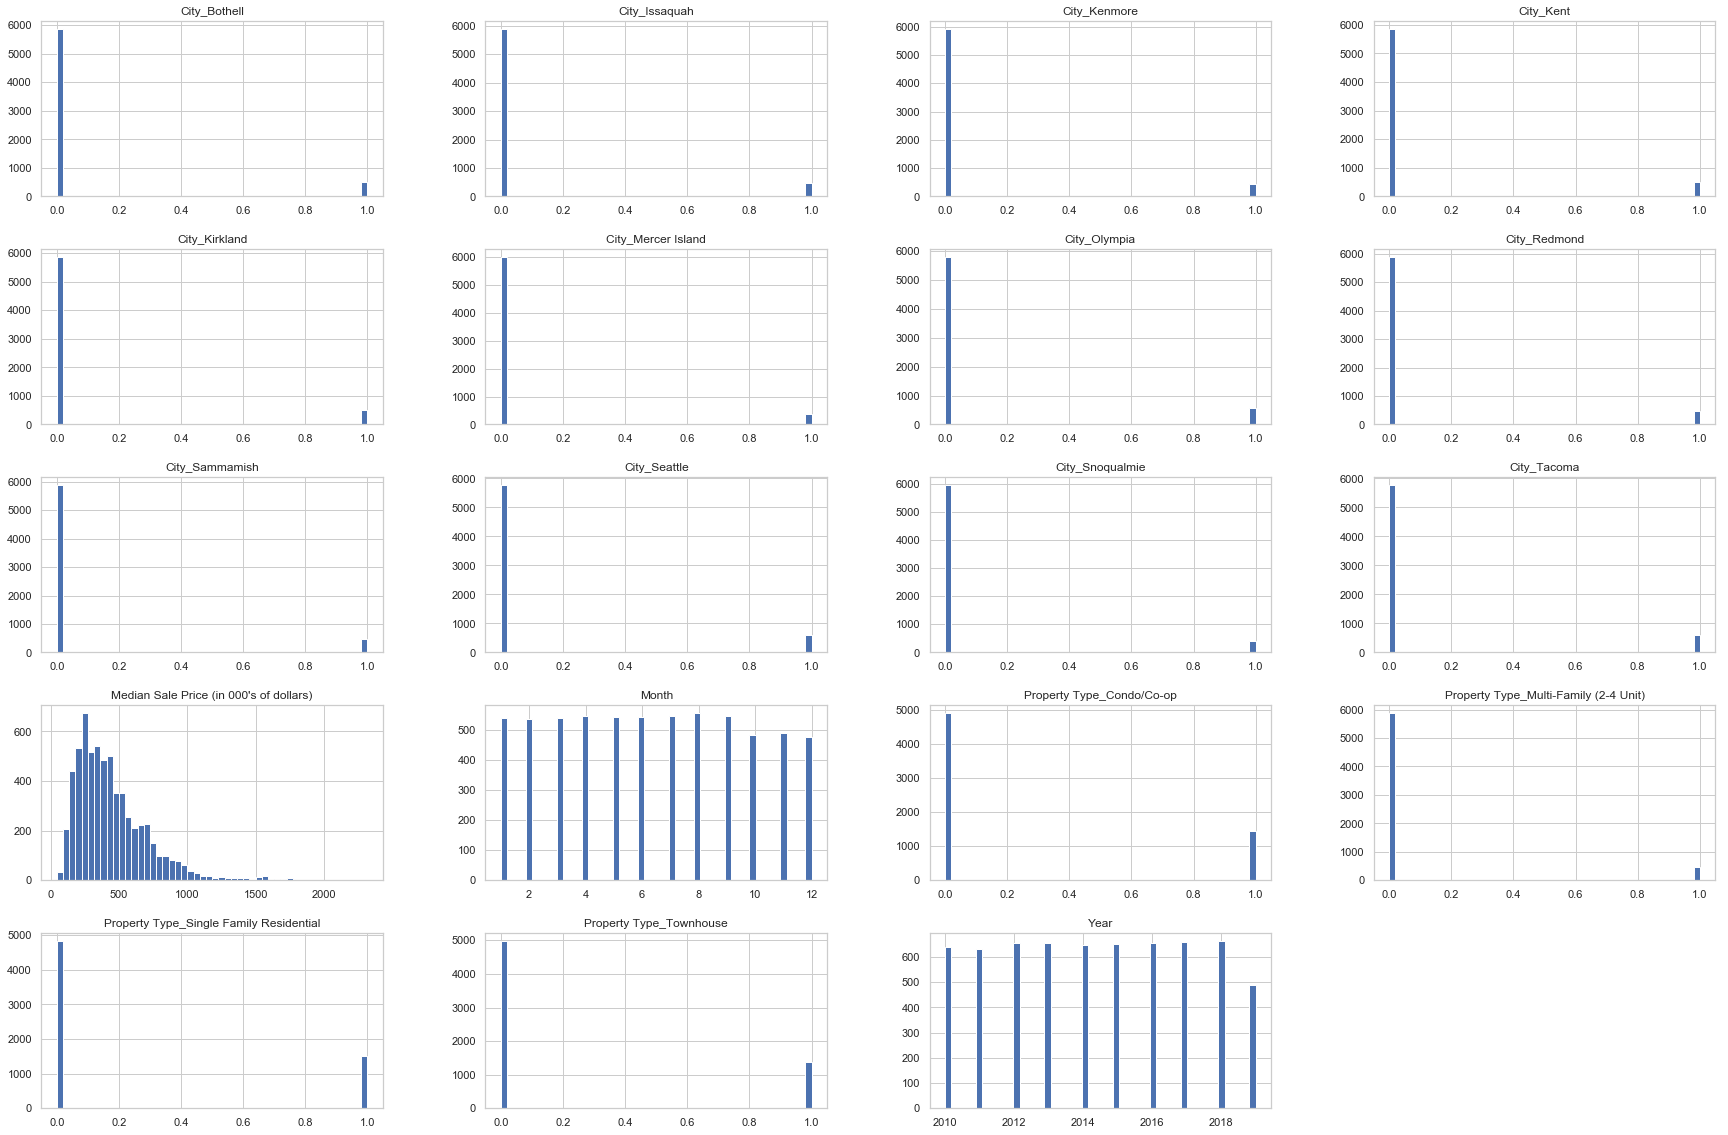

In [185]:
df.hist(bins=50, figsize=(30,20))
plt.show()

# Log Transformation of 'Median Sale Price' to reduce skewness

Skew is: -0.03630573900624505


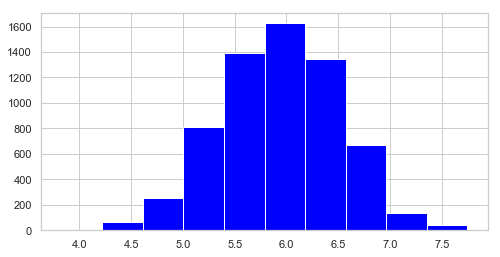

In [186]:
df["Median Sale Price (in 000's of dollars)"] = np.log(df["Median Sale Price (in 000's of dollars)"])
print ("Skew is:", df["Median Sale Price (in 000's of dollars)"].skew())
plt.figure(figsize=(8,4))
plt.hist(df["Median Sale Price (in 000's of dollars)"], color='blue')
plt.show()

# Data Visualization

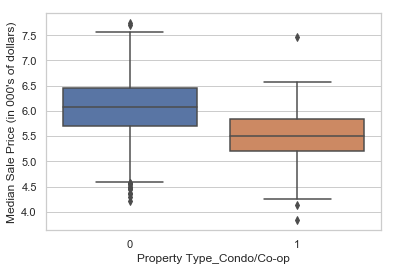

In [187]:
sns.boxplot(x= df['Property Type_Condo/Co-op'], y=df["Median Sale Price (in 000's of dollars)"])

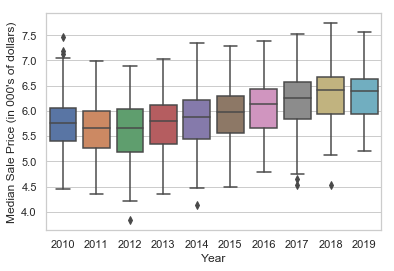

In [188]:
sns.boxplot(x= df['Year'], y=df["Median Sale Price (in 000's of dollars)"])

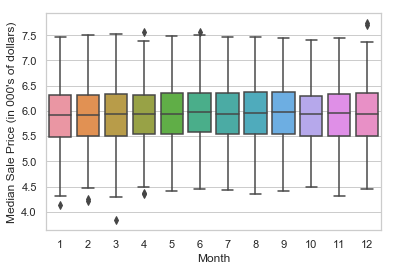

In [189]:
sns.boxplot(x= df['Month'], y=df["Median Sale Price (in 000's of dollars)"])

# Printing correlation values of each coefficient with respect to Median Sale Price


In [190]:
corr_matrix = df.corr()
cor_target=abs(corr_matrix["Median Sale Price (in 000's of dollars)"]).sort_values(ascending=False)
cor_target

Median Sale Price (in 000's of dollars)    1.000000
Year                                       0.430413
Property Type_Condo/Co-op                  0.417609
City_Tacoma                                0.347081
Property Type_Single Family Residential    0.317206
City_Mercer Island                         0.300960
City_Olympia                               0.276659
City_Kent                                  0.254325
Property Type_Townhouse                    0.133289
City_Seattle                               0.131654
City_Sammamish                             0.115782
City_Redmond                               0.087985
City_Snoqualmie                            0.074730
City_Kirkland                              0.066971
City_Issaquah                              0.063876
City_Bothell                               0.029387
City_Kenmore                               0.021536
Property Type_Multi-Family (2-4 Unit)      0.013620
Month                                      0.009051
Name: Median

# Heatmap to visualize correlation between various features and the target variable

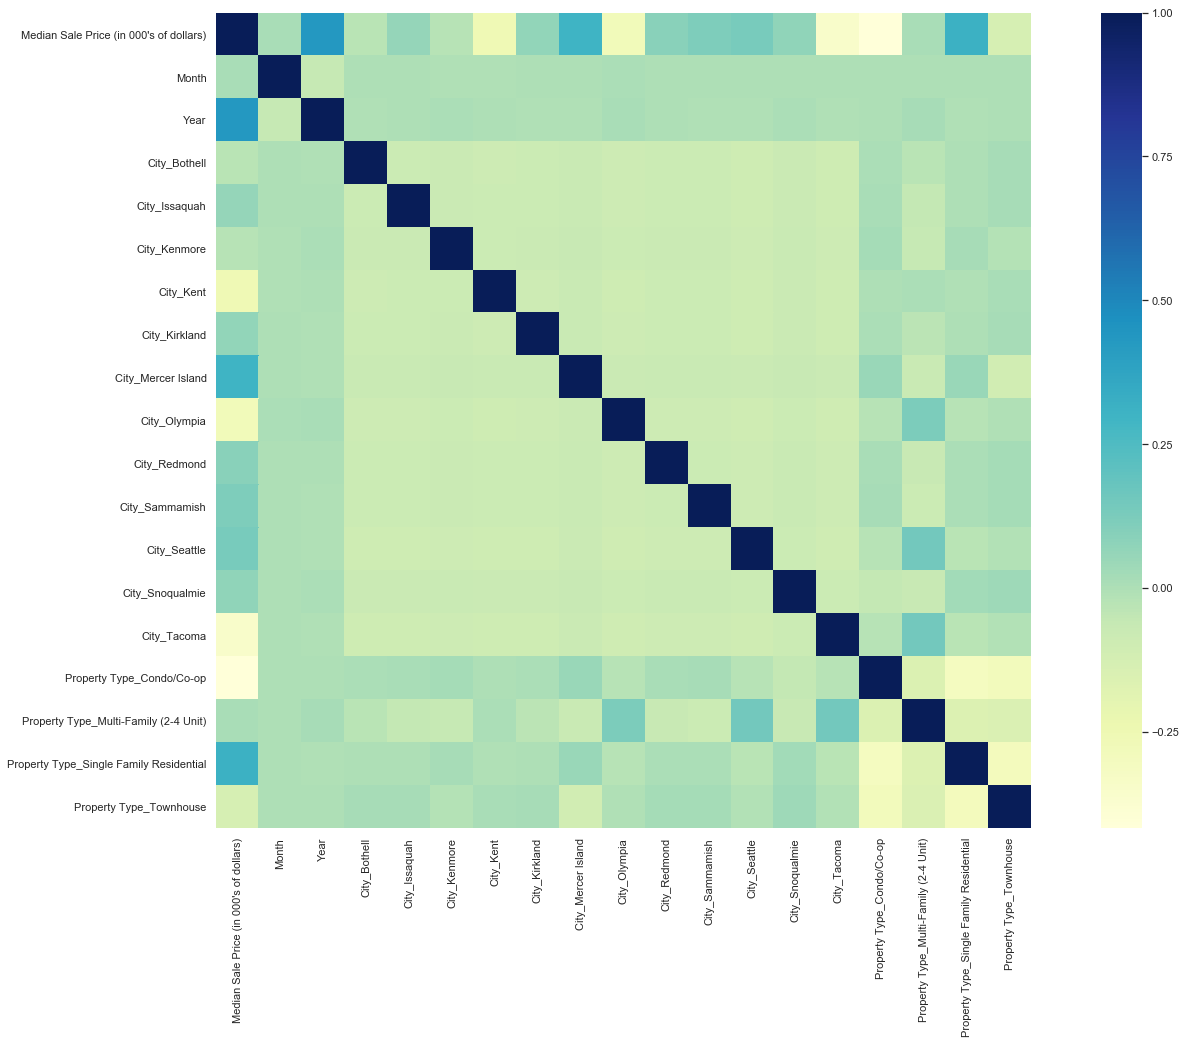

In [191]:
corrmat =df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=False, fmt='.2f',cmap="YlGnBu")

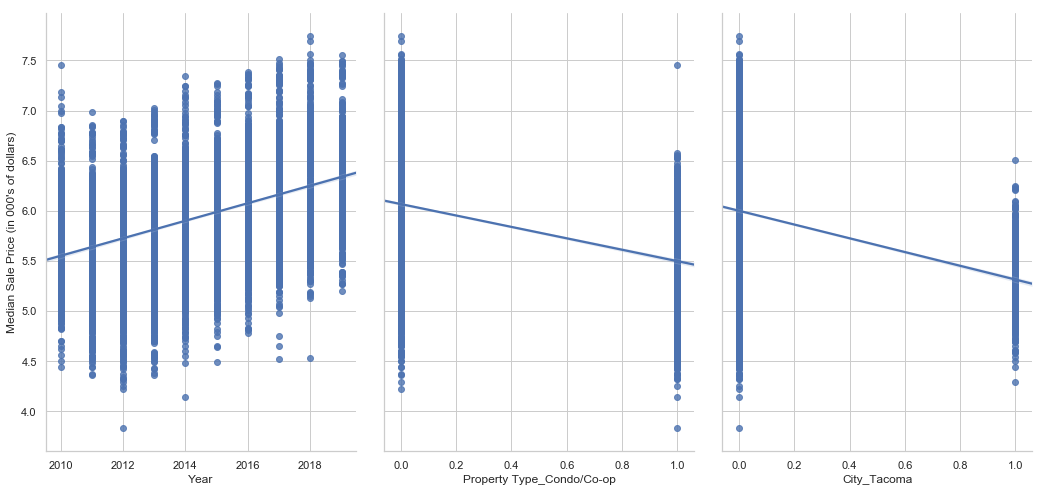

In [192]:
sns.pairplot(df, x_vars=['Year','Property Type_Condo/Co-op','City_Tacoma'], y_vars="Median Sale Price (in 000's of dollars)", size=7, aspect=0.7, kind='reg')

In [193]:
Xall = df[['Year', 'Property Type_Condo/Co-op', 'City_Tacoma', 'Property Type_Single Family Residential', 'City_Mercer Island', 'City_Olympia', 'City_Kent', 'Property Type_Townhouse', 'City_Seattle', 'City_Sammamish', 'City_Redmond', 'City_Snoqualmie', 'City_Kirkland', 'City_Issaquah', 'City_Bothell', 'City_Kenmore', 'Property Type_Multi-Family (2-4 Unit)', 'Month']]
yall = df["Median Sale Price (in 000's of dollars)"]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(Xall, yall, test_size=0.20, random_state=0)

In [195]:
#Initialize Linear Regression variable
LinearRegression = linear_model.LinearRegression()
LinearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
X_withconst = sm.add_constant(X_train)
model = sm.OLS(y_train, X_withconst)
results = model.fit()
print(results.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.856
Model:                                                 OLS   Adj. R-squared:                  0.856
Method:                                      Least Squares   F-statistic:                     1673.
Date:                                     Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                                             11:49:05   Log-Likelihood:                 592.46
No. Observations:                                     5077   AIC:                            -1147.
Df Residuals:                                         5058   BIC:                            -1023.
Df Model:                                               18                                         
Covariance Type:                                 nonrobust                                         


In [199]:
predictions = LinearRegression.predict(X_test)
printStatistics(y_test,predictions)


MAE:0.04743332149595635


NameError: name 'rmse' is not defined

# Feature Selection

# Determine R-Squared by fitting individual predictors

In [130]:
feature_columns = df[['Year', 'Property Type_Condo/Co-op', 'City_Tacoma', 'Property Type_Single Family Residential', 'City_Mercer Island', 'City_Olympia', 'City_Kent', 'Property Type_Townhouse', 'City_Seattle', 'City_Sammamish', 'City_Redmond', 'City_Snoqualmie', 'City_Kirkland', 'City_Issaquah', 'City_Bothell', 'City_Kenmore', 'Property Type_Multi-Family (2-4 Unit)', 'Month']]
ytarget1 = df["Median Sale Price (in 000's of dollars)"]

In [131]:
for f in feature_columns:
    print(f)
    Xallpr = df[f]
    Xallpr= Xallpr.values.reshape(-1,1)
    Xnew = sm.add_constant(Xallpr)
    est = sm.OLS(ytarget1, Xnew)
    est2 = est.fit()
    print(est2.summary())

Year
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.185
Model:                                                 OLS   Adj. R-squared:                  0.185
Method:                                      Least Squares   F-statistic:                     1443.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):          1.21e-284
Time:                                             15:20:21   Log-Likelihood:                -4806.7
No. Observations:                                     6347   AIC:                             9617.
Df Residuals:                                         6345   BIC:                             9631.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                     

# Forward stepwise feature selection¶

# 1st important feature is Year

In [132]:
feature_columns = df[['Year', 'Property Type_Condo/Co-op', 'City_Tacoma', 'Property Type_Single Family Residential', 'City_Mercer Island', 'City_Olympia', 'City_Kent', 'Property Type_Townhouse', 'City_Seattle', 'City_Sammamish', 'City_Redmond', 'City_Snoqualmie', 'City_Kirkland', 'City_Issaquah', 'City_Bothell', 'City_Kenmore', 'Property Type_Multi-Family (2-4 Unit)', 'Month']]
ytarget8 = df["Median Sale Price (in 000's of dollars)"]

In [133]:
for f in feature_columns:
    if f not in ['Year']:
        print(f)
        xfeat8 = df[['Year',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

Property Type_Condo/Co-op
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.360
Model:                                                 OLS   Adj. R-squared:                  0.360
Method:                                      Least Squares   F-statistic:                     1785.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:21   Log-Likelihood:                -4040.3
No. Observations:                                     6347   AIC:                             8087.
Df Residuals:                                         6344   BIC:                             8107.
Df Model:                                                2                                         
Covariance Type:                                 nonrobust                

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.185
Model:                                                 OLS   Adj. R-squared:                  0.185
Method:                                      Least Squares   F-statistic:                     721.5
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):          4.78e-283
Time:                                             15:20:21   Log-Likelihood:                -4806.6
No. Observations:                                     6347   AIC:                             9619.
Df Residuals:                                         6344   BIC:                             9639.
Df Model:                                                2                                         
Covariance Type:                                 nonrobust                                         


# 2nd important feature Property Type_Condo/Co-op 

In [134]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Tacoma
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.486
Model:                                                 OLS   Adj. R-squared:                  0.486
Method:                                      Least Squares   F-statistic:                     1998.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:21   Log-Likelihood:                -3345.4
No. Observations:                                     6347   AIC:                             6699.
Df Residuals:                                         6343   BIC:                             6726.
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                              

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.360
Model:                                                 OLS   Adj. R-squared:                  0.360
Method:                                      Least Squares   F-statistic:                     1191.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:21   Log-Likelihood:                -4039.3
No. Observations:                                     6347   AIC:                             8087.
Df Residuals:                                         6343   BIC:                             8114.
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                                         


# 3rd important feature City_Tacoma

In [135]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

Property Type_Single Family Residential
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.521
Model:                                                 OLS   Adj. R-squared:                  0.521
Method:                                      Least Squares   F-statistic:                     1727.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:21   Log-Likelihood:                -3118.7
No. Observations:                                     6347   AIC:                             6247.
Df Residuals:                                         6342   BIC:                             6281.
Df Model:                                                4                                         
Covariance Type:                                 nonrobust  

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.488
Model:                                                 OLS   Adj. R-squared:                  0.488
Method:                                      Least Squares   F-statistic:                     1511.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:22   Log-Likelihood:                -3332.5
No. Observations:                                     6347   AIC:                             6675.
Df Residuals:                                         6342   BIC:                             6709.
Df Model:                                                4                                         
Covariance Type:                                 nonrobust                                         


# 4th important feature Property Type_Single Family Residential

In [136]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Mercer Island
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.603
Model:                                                 OLS   Adj. R-squared:                  0.603
Method:                                      Least Squares   F-statistic:                     1928.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:22   Log-Likelihood:                -2523.0
No. Observations:                                     6347   AIC:                             5058.
Df Residuals:                                         6341   BIC:                             5099.
Df Model:                                                5                                         
Covariance Type:                                 nonrobust                       

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.523
Model:                                                 OLS   Adj. R-squared:                  0.523
Method:                                      Least Squares   F-statistic:                     1390.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:22   Log-Likelihood:                -3108.0
No. Observations:                                     6347   AIC:                             6228.
Df Residuals:                                         6341   BIC:                             6268.
Df Model:                                                5                                         
Covariance Type:                                 nonrobust                                         


# 5th important feature City_Mercer Island

In [137]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Olympia
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.693
Model:                                                 OLS   Adj. R-squared:                  0.692
Method:                                      Least Squares   F-statistic:                     2381.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:22   Log-Likelihood:                -1712.9
No. Observations:                                     6347   AIC:                             3440.
Df Residuals:                                         6340   BIC:                             3487.
Df Model:                                                6                                         
Covariance Type:                                 nonrobust                             

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.610
Model:                                                 OLS   Adj. R-squared:                  0.610
Method:                                      Least Squares   F-statistic:                     1654.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:22   Log-Likelihood:                -2467.0
No. Observations:                                     6347   AIC:                             4948.
Df Residuals:                                         6340   BIC:                             4995.
Df Model:                                                6                                         
Covariance Type:                                 nonrobust                                         


# 6th important feature City_Olympia

In [138]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Kent
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.783
Model:                                                 OLS   Adj. R-squared:                  0.783
Method:                                      Least Squares   F-statistic:                     3265.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:22   Log-Likelihood:                -610.14
No. Observations:                                     6347   AIC:                             1236.
Df Residuals:                                         6339   BIC:                             1290.
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                                

# 7th important feature City_Kent

In [139]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

Property Type_Townhouse
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.825
Model:                                                 OLS   Adj. R-squared:                  0.824
Method:                                      Least Squares   F-statistic:                     3723.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:23   Log-Likelihood:                 66.199
No. Observations:                                     6347   AIC:                            -114.4
Df Residuals:                                         6338   BIC:                            -53.60
Df Model:                                                8                                         
Covariance Type:                                 nonrobust                  

# 8th important feature Property Type_Townhouse

for f in feature_columns:
    if f not in ['Month','Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island']:
        print(f)
        Xfeat3 = df[['Month','Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island',f]]
        X_withconst3 = sm.add_constant(Xfeat3)
        model3 = sm.OLS(ytarget3, X_withconst3)
        result3 = model3.fit()
        print(result3.summary())

In [140]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Seattle
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.826
Model:                                                 OLS   Adj. R-squared:                  0.826
Method:                                      Least Squares   F-statistic:                     3338.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:23   Log-Likelihood:                 89.234
No. Observations:                                     6347   AIC:                            -158.5
Df Residuals:                                         6337   BIC:                            -90.91
Df Model:                                                9                                         
Covariance Type:                                 nonrobust                             

# 9th important feature City_Seattle

In [141]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Sammamish
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.829
Model:                                                 OLS   Adj. R-squared:                  0.829
Method:                                      Least Squares   F-statistic:                     3077.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:24   Log-Likelihood:                 152.70
No. Observations:                                     6347   AIC:                            -283.4
Df Residuals:                                         6336   BIC:                            -209.1
Df Model:                                               10                                         
Covariance Type:                                 nonrobust                           

# 10th important feature City_Sammamish

In [142]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Redmond
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.831
Model:                                                 OLS   Adj. R-squared:                  0.830
Method:                                      Least Squares   F-statistic:                     2823.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:24   Log-Likelihood:                 176.62
No. Observations:                                     6347   AIC:                            -329.2
Df Residuals:                                         6335   BIC:                            -248.2
Df Model:                                               11                                         
Covariance Type:                                 nonrobust                             

# 11th important feature City_Redmond

In [143]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Snoqualmie
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.831
Model:                                                 OLS   Adj. R-squared:                  0.830
Method:                                      Least Squares   F-statistic:                     2587.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:25   Log-Likelihood:                 176.74
No. Observations:                                     6347   AIC:                            -327.5
Df Residuals:                                         6334   BIC:                            -239.7
Df Model:                                               12                                         
Covariance Type:                                 nonrobust                          

# 12th important feature City_Snoqualmie

In [144]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Kirkland
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.831
Model:                                                 OLS   Adj. R-squared:                  0.831
Method:                                      Least Squares   F-statistic:                     2393.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:25   Log-Likelihood:                 182.66
No. Observations:                                     6347   AIC:                            -337.3
Df Residuals:                                         6333   BIC:                            -242.7
Df Model:                                               13                                         
Covariance Type:                                 nonrobust                            

# 13th important feature City_Kirkland

In [145]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Issaquah
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.831
Model:                                                 OLS   Adj. R-squared:                  0.831
Method:                                      Least Squares   F-statistic:                     2228.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:25   Log-Likelihood:                 189.99
No. Observations:                                     6347   AIC:                            -350.0
Df Residuals:                                         6332   BIC:                            -248.6
Df Model:                                               14                                         
Covariance Type:                                 nonrobust                            

# 14th important feature City_Issaquah

In [146]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Bothell
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.838
Model:                                                 OLS   Adj. R-squared:                  0.838
Method:                                      Least Squares   F-statistic:                     2188.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:26   Log-Likelihood:                 325.13
No. Observations:                                     6347   AIC:                            -618.3
Df Residuals:                                         6331   BIC:                            -510.2
Df Model:                                               15                                         
Covariance Type:                                 nonrobust                             

# 15th important feature City_Bothell

In [147]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

City_Kenmore
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.856
Model:                                                 OLS   Adj. R-squared:                  0.856
Method:                                      Least Squares   F-statistic:                     2352.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:26   Log-Likelihood:                 693.03
No. Observations:                                     6347   AIC:                            -1352.
Df Residuals:                                         6330   BIC:                            -1237.
Df Model:                                               16                                         
Covariance Type:                                 nonrobust                             

# 16th important feature City_Kenmore

In [148]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

Property Type_Multi-Family (2-4 Unit)
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.856
Model:                                                 OLS   Adj. R-squared:                  0.856
Method:                                      Least Squares   F-statistic:                     2221.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:26   Log-Likelihood:                 703.19
No. Observations:                                     6347   AIC:                            -1370.
Df Residuals:                                         6329   BIC:                            -1249.
Df Model:                                               17                                         
Covariance Type:                                 nonrobust    

# 17th important feature Property Type_Multi-Family (2-4 Unit)

In [149]:
for f in feature_columns:
    if f not in ['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)']:
        print(f)
        xfeat8 = df[['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)',f]]
        X_withconst8 = sm.add_constant(xfeat8)
        model8 = sm.OLS(ytarget8, X_withconst8)
        result8 = model8.fit()
        print(result8.summary())

Month
                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.858
Model:                                                 OLS   Adj. R-squared:                  0.857
Method:                                      Least Squares   F-statistic:                     2118.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:27   Log-Likelihood:                 729.18
No. Observations:                                     6347   AIC:                            -1420.
Df Residuals:                                         6328   BIC:                            -1292.
Df Model:                                               18                                         
Covariance Type:                                 nonrobust                                    

# 18th important feature Month

# Cross-validation

In [150]:
forward_selection_cv = { 
'M1':['Year'],
'M2':['Year','Property Type_Condo/Co-op'],
'M3':['Year','Property Type_Condo/Co-op','City_Tacoma'],
'M4':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential'],
'M5':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island'],
'M6':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia'],
'M7':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent',],
'M8':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse'],
'M9':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle'],
'M10':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish'],
'M11':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond'],
'M12':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie'],
'M13':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland'],
'M14':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah'],
'M15':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell'],
'M16':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore'],
'M17':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)'],
'M18':['Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)','Month'],
}


In [151]:
# check cross-validation scores with selected features
from sklearn.model_selection import cross_val_score
lm9 = linear_model.LinearRegression()
for model in forward_selection_cv.keys():
    Xres = df[forward_selection_cv[model]]
    scores = cross_val_score(lm9, Xres, ytarget8, cv=10, scoring='neg_mean_squared_error')
    print(model, -scores.mean(), scores.std())

M1 0.26741126579774527 0.02164772924433492
M2 0.20959572017717365 0.036129536532780095
M3 0.16875455370243805 0.01810354891159886
M4 0.15780306050223594 0.015856366442957952
M5 0.13106137744070848 0.010103865199752485
M6 0.10236505404610956 0.012393566872709212
M7 0.07264537335765467 0.014308556419272714
M8 0.058182520297566986 0.01711165010926866
M9 0.05779534915126947 0.0169924906369192
M10 0.05669833337243411 0.017128318704936713
M11 0.056291075528571634 0.017355691290677155
M12 0.05630561708667462 0.01737353420786504
M13 0.05621888466175471 0.017461018024581807
M14 0.056104288185843135 0.017573010239813877
M15 0.053838698267895814 0.017165671653422407
M16 0.047967851473122936 0.016213255070862877
M17 0.0478633855316835 0.016542734012111173
M18 0.047499342563938896 0.016599768665518207


# Fit a linear regression with selected features

In [152]:
Xfeat10 = df[forward_selection_cv['M18']]
ytarget10 = df["Median Sale Price (in 000's of dollars)"]

In [153]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train10, X_test10, y_train10, y_test10 = train_test_split(Xfeat10, ytarget10, test_size=0.2, random_state=1)
LinearRegression10 = linear_model.LinearRegression()
LinearRegression10.fit(X_train10,y_train10)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
X_withconst10 = sm.add_constant(X_train10)
model10 = sm.OLS(y_train10, X_withconst10)
result10 = model10.fit()
print(result10.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Median Sale Price (in 000's of dollars)   R-squared:                       0.860
Model:                                                 OLS   Adj. R-squared:                  0.859
Method:                                      Least Squares   F-statistic:                     1721.
Date:                                     Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                                             15:20:30   Log-Likelihood:                 576.12
No. Observations:                                     5077   AIC:                            -1114.
Df Residuals:                                         5058   BIC:                            -990.1
Df Model:                                               18                                         
Covariance Type:                                 nonrobust                                         


X_withconst10 = sm.add_constant(X_train10)
model10 = sm.OLS(y_train10, X_withconst10)
result10 = model10.fit()
print(result10.summary())

Mean squared error:0.046129579253968565
Root mean squared error: 0.21477797665023424
R-squared value: 0.8481751376315549


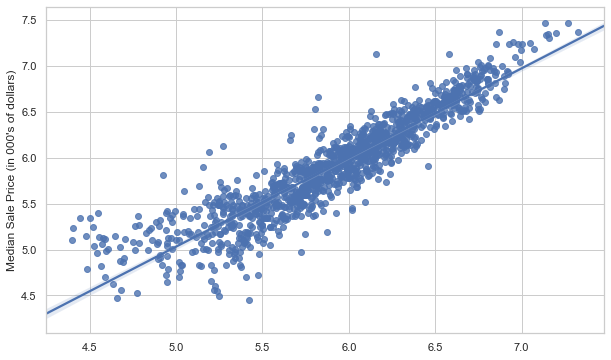

In [155]:
predictionscv = LinearRegression10.predict(X_test10)
printStatistics(y_test10,predictionscv)

# Polynomial regression : To check if it improves R-Squared

In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from sklearn import metrics

degree=[1,2,3]
r2_score_polydegrees=[]
rmse_polyfeatures=[]
for degrees in degree:
    est = make_pipeline(PolynomialFeatures(degree=degrees,interaction_only=True), StandardScaler(), linear_model.LinearRegression())
    est.fit(X_train10, y_train10)
    mse = metrics.mean_squared_error(y_train10, est.predict(X_train10))
    rmse_polyfeatures.append(np.sqrt(metrics.mean_squared_error(y_train10, est.predict(X_train10))))
    r2_score_polydegrees.append(est.score(X_train10,y_train10))
print(r2_score_polydegrees,rmse_polyfeatures)

[0.8596466596346934, 0.9099881194456695, 0.9138245673116072] [0.2160133751357799, 0.17298927704753425, 0.1692625979542113]


Mean squared error:0.021324569914564998
Root mean squared error: 0.14602934607319515
R-squared value: 0.9298151003172963


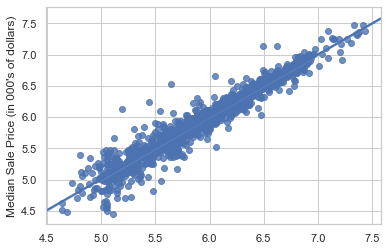

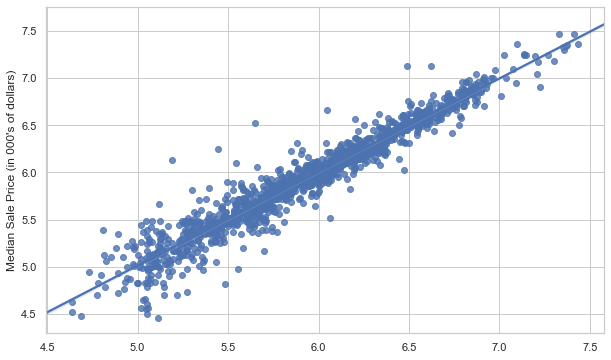

In [157]:
from sklearn.preprocessing import PolynomialFeatures
# Cubic
poly = PolynomialFeatures(degree=3)
X_trainpoly = poly.fit_transform(X_train10)
X_testpoly = poly.fit_transform(X_test10)
CubicPolynomial = LinearRegression10.fit(X_trainpoly, y_train10)
predictionspoly = CubicPolynomial.predict(X_testpoly)
sns.set(style="whitegrid")
sns.regplot(x=predictionspoly,y=y_test10)

printStatistics(y_test10,predictionspoly) 


# Regularization to reduce over fitting

# Fit Ridge Regression

In [158]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# list row sample - [‘ridge’,degree,alpha,MSE,R^2]

alphas =[0.0001,0.0005,0.001,0.005,0.1,0.5,1,1.5]
sse_tr_ridge=[]
r2_tr_ridge=[]
for alpha in alphas:
    rid = make_pipeline(PolynomialFeatures(3, interaction_only=True),StandardScaler(),Ridge(alpha=alpha))
    rid.fit(X_train10, y_train10)
    sse_tr_ridge.append(np.sqrt(mean_squared_error(y_train10, rid.predict(X_train10))))
    r2_tr_ridge.append(rid.score(X_train10,y_train10))
print(sse_tr_ridge,r2_tr_ridge)

[0.16931364793943662, 0.16951123691783193, 0.16971358067705117, 0.17107914290150145, 0.17758644710660101, 0.1788729419833857, 0.17906037352175416, 0.17912543040269951] [0.913772578059034, 0.9135712058737587, 0.9133647444586759, 0.9119649532049858, 0.9051404401909436, 0.9037610739670855, 0.903559280890923, 0.9034891897587702]


# Fit Lasso Regression

In [159]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
# list row sample - [‘lasso’,degree,alpha,MSE,R^2]

alphas =[0.0001,0.0005,0.001,0.005,0.1,0.5,1,1.5]
sse_tr_lasso=[]
r2_tr_lasso=[]
for alpha in alphas:
    las = make_pipeline(PolynomialFeatures(3, interaction_only=True),StandardScaler(),Lasso(alpha=alpha))
    las.fit(X_train10, y_train10)
    sse_tr_lasso.append(np.sqrt(mean_squared_error(y_train10, las.predict(X_train10))))
    r2_tr_lasso.append(las.score(X_train10,y_train10))
print(sse_tr_lasso,r2_tr_lasso)

[0.17928577872062335, 0.17968049504356018, 0.18042442263672198, 0.19009075425976704, 0.3708782453277234, 0.5765928678426735, 0.5765928678426735, 0.5765928678426735] [0.9033163246038024, 0.9028901376010123, 0.902084348873508, 0.8913115349033683, 0.5862631658239889, 0.0, 0.0, 0.0]


#### We see that the r2 is highest ( r2=0.913772578059034) and the root mean square error is lowest (rmse=0.16931364793943662) for alpha=0.0001 and polynomial degree=3 .So lets select a Ridge model with alpha=0.0001

# Fitting best model on test set

In [160]:
#Fitting the above model on test set

est = make_pipeline(PolynomialFeatures(3,interaction_only=True), StandardScaler(), Ridge(0.0001))
est.fit(X_train10, y_train10)
est.predict(X_test10)
rmse_te_Ridge=(np.sqrt(mean_squared_error(y_test10, est.predict(X_test10))))
r2_te_Ridge=(est.score(X_test10,y_test10))
print(rmse_te_Ridge,r2_te_Ridge)

0.17266869628631923 0.9018725252872102


In [161]:
#Delogging Root Mean Square Error (rmse)
rmse_test_delog=np.exp(rmse_te_Ridge)
print(rmse_test_delog)

1.188472294567394


#### Interpretation

The predicted values of median home prices (by this model)=Actual value of home prices +- 1.18% The root mean square error for the training and the test sets are low and almost the same(rmse_test=0.172,rmse_training=0.169).So there is no over fitting or underfitting.Adding a polynomial of degree 3 and regularizing the model with Ridge regularization controlled for underfitting and over fitting.

# Testing the fitted model




Regression Plot

Text(0.5, 0, 'Predicted Y')

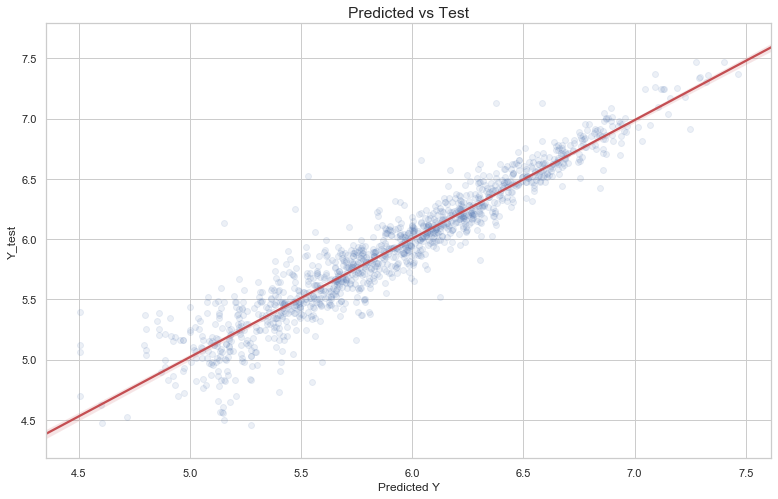

In [162]:
#Regression plot for residuals
test_pred=est.predict(X_test10)
residuals_test=y_test10-test_pred
plt.figure(figsize=(13,8))
sns.set(style="whitegrid")
sns.regplot(test_pred,y_test10,scatter_kws={'color':'b','alpha':0.1},color='r')
sns.set(font_scale=1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y_test')
plt.xlabel('Predicted Y')

# Observation:
The regression plot shows that there’s a strong correlation between the model’s predictions and its actual results.

Text(0.5, 1.0, 'Residual Plot')

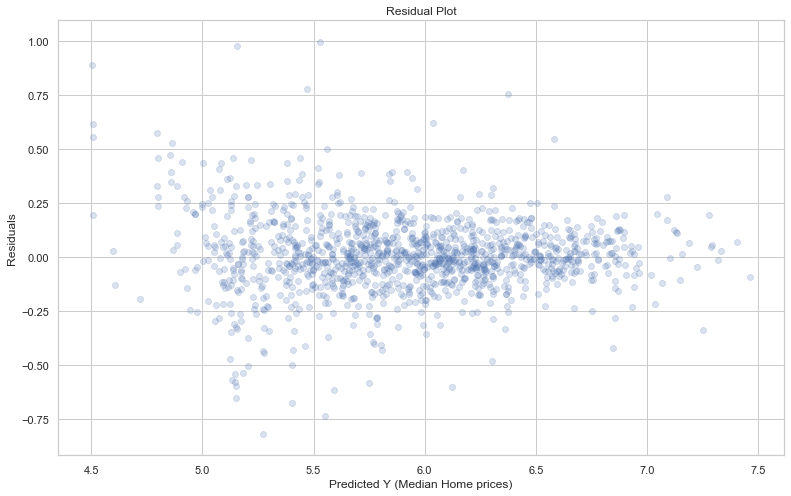

In [163]:
#Residual Plot

sns.set(style="whitegrid")
plt.figure(figsize=(13,8))
plt.scatter(test_pred ,residuals_test,alpha=0.2)
plt.xlabel('Predicted Y (Median Home prices)')
plt.ylabel('Residuals')
plt.title("Residual Plot")

# Distribution of Residuals

Text(0.5, 1.0, 'Normal Q-Q plot')

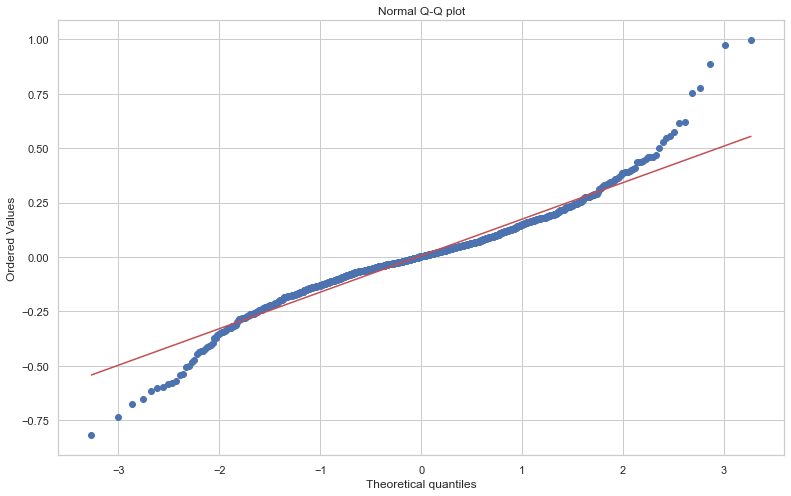

In [164]:
#Normal Q-Q plot

sns.set(style="whitegrid")
plt.figure(figsize=(13,8))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

Text(0.5, 1.0, 'Distribution of Residuals')

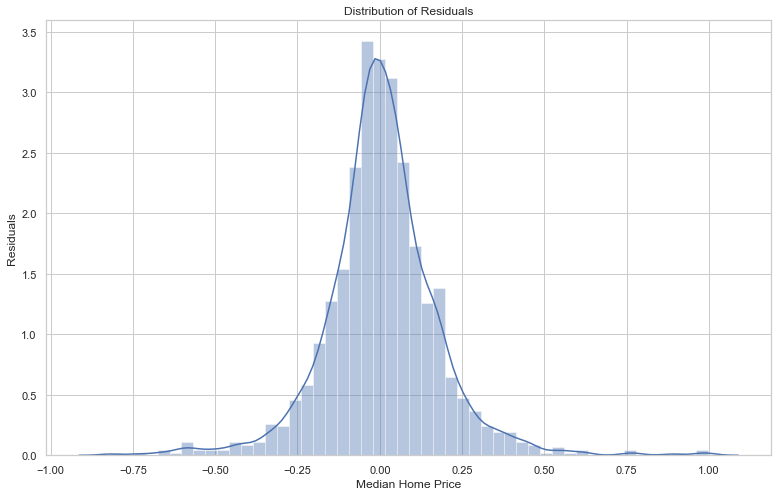

In [165]:
sns.set(style="whitegrid")
plt.figure(figsize=(13,8))
sns.distplot(residuals_test, bins=50, kde=True)
plt.xlabel('Median Home Price')
plt.ylabel('Residuals')
plt.title("Distribution of Residuals")

# Final Observations


The residuals follow a normal distribution fulfilling the assumptions of a linear regression.

# Conclusion


In my test dataset, 90% of the predictions for home prices can be explained by my model.The model predicts the median home prices with an error of +-1.18% of the actual prices


# Predictions

predicting the median sale price for each city by property type for four months from Oct 2019 to Jan 2020

predicting the median sale price for each city by property type for four months from Oct 2019 to Jan 2020

In [166]:
training_df = df
test_df = pd.read_csv('PreProcessedFiles/testformatted.csv')

In [167]:
final_df = pd.concat([training_df, test_df ],axis=0)

In [168]:
Pred_Train=final_df.iloc[:6347,:]
Pred_Test=final_df.iloc[6347:,:]

In [169]:
Xtrain_pred = Pred_Train[['Month','Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)']]
ytrain_pred = Pred_Train["Median Sale Price (in 000's of dollars)"]


Xtest_pred = Pred_Test[['Month','Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)']]

In [170]:
#Predicting values

est = make_pipeline(PolynomialFeatures(3,interaction_only=True), StandardScaler(), Ridge(0.0001))
est.fit(Xtrain_pred, ytrain_pred)
ytest_pred = est.predict(Xtest_pred)


In [171]:
np.savetxt('PreProcessedFiles/predictionsValues.csv',ytest_pred)

# Testing accuracy for professor data

In [172]:
prof_df = pd.read_csv('PreProcessedFiles/professorlist.csv')
train_df = pd.read_csv('PreProcessedFiles/trialformatted.csv')

In [173]:
prof_df.head(1)

,Unnamed: 0,Median Sale Price (in 000's of dollars),Month,Year,City_Bothell,City_Issaquah,City_Kenmore,City_Kent,City_Kirkland,City_Mercer Island,City_Olympia,City_Redmond,City_Sammamish,City_Seattle,City_Snoqualmie,City_Tacoma,Property Type_Condo/Co-op,Property Type_Multi-Family (2-4 Unit),Property Type_Single Family Residential,Property Type_Townhouse
0,0,5.874931,1,2020,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [174]:
prof_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [175]:
testing_df = pd.concat([train_df, prof_df ],axis=0)

In [176]:

Prof_Train=testing_df.iloc[:6347,:]
Prof_Test=testing_df.iloc[6347:,:]


In [177]:
Xtrain_prof = Prof_Train[['Month','Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)']]
ytrain_prof = Prof_Train["Median Sale Price (in 000's of dollars)"]


Xtest_prof = Prof_Test[['Month','Year','Property Type_Condo/Co-op','City_Tacoma','Property Type_Single Family Residential','City_Mercer Island','City_Olympia','City_Kent','Property Type_Townhouse','City_Seattle','City_Sammamish','City_Redmond','City_Snoqualmie','City_Kirkland','City_Issaquah','City_Bothell','City_Kenmore','Property Type_Multi-Family (2-4 Unit)']]
ytest_prof = Prof_Test["Median Sale Price (in 000's of dollars)"]




In [178]:
est = make_pipeline(PolynomialFeatures(3,interaction_only=True), StandardScaler(), Ridge(0.0001))
est.fit(Xtrain_prof, ytrain_prof)
est.predict(Xtest_prof)
rmse_te_Ridge=(np.sqrt(mean_squared_error(ytest_prof, est.predict(Xtest_prof))))
r2_te_Ridge=(est.score(Xtest_prof,ytest_prof))
print(rmse_te_Ridge,r2_te_Ridge)

0.17340977364864782 0.8469018493180704


Text(0.5, 0, 'Predicted Y')

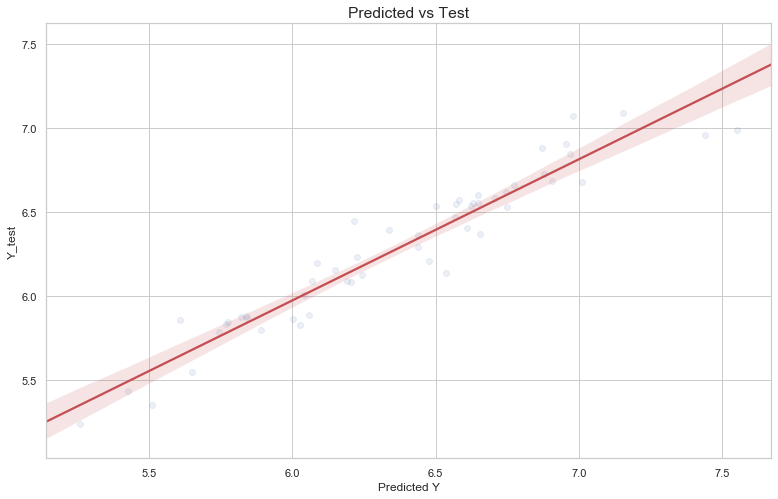

In [179]:
#Regression plot for residuals
test_pred=est.predict(Xtest_prof)
residuals_test=ytest_prof-test_pred
plt.figure(figsize=(13,8))
sns.set(style="whitegrid")
sns.regplot(test_pred,ytest_prof,scatter_kws={'color':'b','alpha':0.1},color='r')
sns.set(font_scale=1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y_test')
plt.xlabel('Predicted Y')